# Simple Pendulum Problem



In [1]:
using OrdinaryDiffEq, Plots

In [2]:
#Constants
const g = 9.81
L = 1.0

1.0

In [3]:
#Initial Conditions
u₀ = [0,π/2]
tspan = (0.0,6.3)



(0.0, 6.3)

In [5]:
#Define the problem
function simplependulum(du,u,p,t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*sin(θ)
end



simplependulum (generic function with 1 method)

In [6]:
#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob,Tsit5())



retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 33-element Vector{Float64}:
 0.0
 0.0006362147454811361
 0.006998362200292497
 0.03660216163106764
 0.09522902219251353
 0.17748934143704403
 0.28383650348392064
 0.4185305866468124
 0.5722776127723227
 0.7241766040697459
 0.9174445901770459
 1.1209185861398787
 1.3105830097476352
 ⋮
 3.561225211001187
 3.8388019356876377
 4.105096195458151
 4.38034042869402
 4.6522983884114275
 4.920576066334854
 5.203203330734459
 5.464438017379163
 5.752593667289859
 6.003097791026381
 6.298729037342623
 6.3
u: 33-element Vector{Vector{Float64}}:
 [0.0, 1.5707963267948966]
 [0.0009993631238780826, 1.5707932081482545]
 [0.010992121372010251, 1.5704189893030465]
 [0.05736870622276341, 1.560488254247696]
 [0.14737974825321118, 1.5015676987217073]
 [0.2647112634453346, 1.335664195671971]
 [0.38987224917706853, 0.9975316008469555]
 [0.4872545527723253, 0.42901698648794756]
 [0.49762517670788575, -0.29640876217458934]
 [0.400971

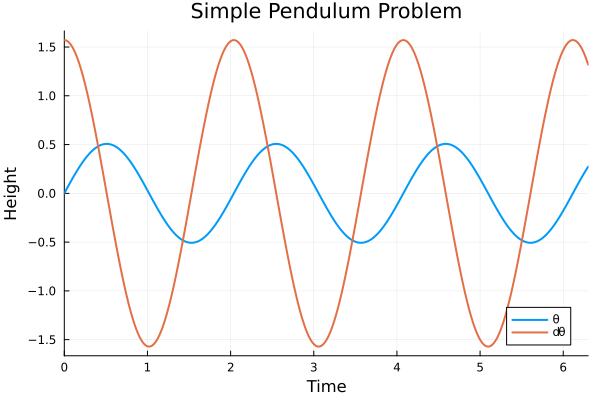

In [7]:
#Plot
plot(sol,linewidth=2,title ="Simple Pendulum Problem", xaxis = "Time", yaxis = "Height", label = ["\\theta" "d\\theta"])



# Single mode clarinet

## Constants

In [496]:
ζ = 0.3
γ = 0.5
α = 0.001
# resonator

ω₁ = 3141
q₁ = 30
f₁ = q₁
# reed
fᵣ = 1
ωᵣ = 12000
qᵣ = 2

2

## Initial conditions

In [497]:

u₀ = [0.1,0]
tspan = (0.0,0.1)

(0.0, 0.1)

## Define the problem

In [507]:
function clarinet(du,u,par,t)
    
    p = u[1]
    dp = u[2]
    x=(p-γ)
    dx = dp

    a = √(abs(γ-p)+α^2)
    if x < -1.0
        dv = 0
    else
        dv = ζ * (dx * sign(γ - p)*(a-α) - (1+x) * dp / (2 * a) )
    end
    
    ddp = ω₁*f₁ * dv - ω₁/q₁ * dp - ω₁^2 * p
    
    du[1] = dp
    du[2] = ddp
end



clarinet (generic function with 1 method)

In [508]:
prob = ODEProblem(clarinet, u₀, tspan, dt=0.0001)
sol = solve(prob,Rosenbrock23())
#soln = solve(prob,Tsit5())

retcode: Success
Interpolation: specialized 2nd order "free" stiffness-aware interpolation
t: 5331-element Vector{Float64}:
 0.0
 7.048987152674037e-5
 8.458784583208843e-5
 0.00015231254807023653
 0.00017549294893918322
 0.00022181598256311907
 0.0002483404415595331
 0.0002786144998059148
 0.00030221675832974417
 0.000319554392091752
 0.0003317195602435467
 0.0003438847283953414
 0.0003573451245500808
 ⋮
 0.09994631532684838
 0.09994905104382527
 0.09995253287994701
 0.09995610127412526
 0.099960363109461
 0.09996490907678664
 0.0999702119230728
 0.09997602530595767
 0.09998276470445436
 0.09999034133873641
 0.09999920777458637
 0.1
u: 5331-element Vector{Vector{Float64}}:
 [0.1, 0.0]
 [0.09721887435310342, -80.94218928708354]
 [0.09594287124318512, -100.17687042399525]
 [0.08548289818227837, -211.92537447759082]
 [0.08001720535707092, -260.22422401511]
 [0.06523658987795543, -381.4139927896493]
 [0.053931803829553523, -472.79311889395154]
 [0.037622997593605254, -608.1787705975365]
 

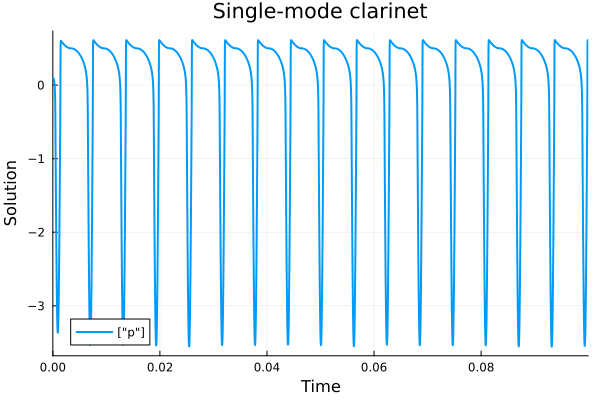

In [509]:
plot(sol,linewidth=2,title ="Single-mode clarinet", xaxis = "Time", yaxis = "Solution", idxs=[1], label = ["p"])
#plot!(soln,linewidth=2,title ="Single-mode clarinet", xaxis = "Time", yaxis = "Solution", idxs=[1], label = ["p"])


In [510]:
du=[0,0]
dd=clarinet(du,u₀,[],0)
du

LoadError: InexactError: Int64(-986588.1000000001)

In [115]:
? convert

search: convert ConcurrencyViolationError code_native @code_native



```
convert(T, x)
```

Convert `x` to a value of type `T`.

If `T` is an [`Integer`](@ref) type, an [`InexactError`](@ref) will be raised if `x` is not representable by `T`, for example if `x` is not integer-valued, or is outside the range supported by `T`.

# Examples

```jldoctest
julia> convert(Int, 3.0)
3

julia> convert(Int, 3.5)
ERROR: InexactError: Int64(3.5)
Stacktrace:
[...]
```

If `T` is a [`AbstractFloat`](@ref) type, then it will return the closest value to `x` representable by `T`.

```jldoctest
julia> x = 1/3
0.3333333333333333

julia> convert(Float32, x)
0.33333334f0

julia> convert(BigFloat, x)
0.333333333333333314829616256247390992939472198486328125
```

If `T` is a collection type and `x` a collection, the result of `convert(T, x)` may alias all or part of `x`.

```jldoctest
julia> x = Int[1, 2, 3];

julia> y = convert(Vector{Int}, x);

julia> y === x
true
```

See also: [`round`](@ref), [`trunc`](@ref), [`oftype`](@ref), [`reinterpret`](@ref).
